In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [25]:
# import tensorflow as tf
# from tensorflow.keras.datasets import fashion_mnist
train_data=pd.read_csv('/content/fashion-mnist_train.csv')
test_data=pd.read_csv('/content/fashion-mnist_test.csv')
train_labels = train_data['label']
test_labels = test_data['label']
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

train_data.drop(columns=['label'],inplace=True)
test_data.drop(columns=['label'],inplace=True)

train_data = train_data.to_numpy().reshape(60000, 28, 28)
test_data = test_data.to_numpy().reshape(10000, 28, 28)

# The data has already been sorted into training and test sets for us
# train_data.shape,train_labels.shape,test_data.shape,test_labels.shape
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape


(60000, 785) (60000,) (10000, 785) (10000,)


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [6]:
train_data[0].shape, train_labels[0].shape


((28, 28), ())

In [7]:

# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         83,  77,  78,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0, 122,
        123,   0,  65, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   7, 162,
          0,   0,   0, 116,  55,   0,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 105, 116,
          0,   6,   0,  62, 121,   0,   5,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 160,  53,
          0,   3,   0,  10, 148,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  22, 171,   0,
          0,   0,   2,   0, 122,  14,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  

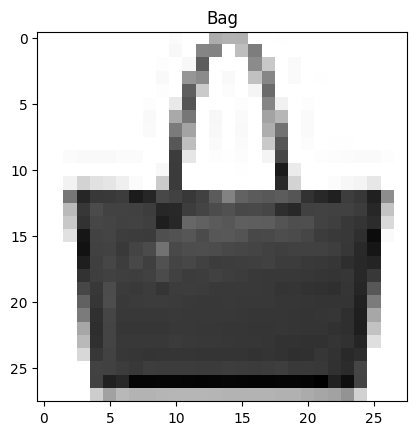

In [8]:

# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

train_data[index_of_choice]

In [9]:

# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)


model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
HISTORY = model.fit(tf.expand_dims(train_data_norm,axis=-1),
                            train_labels,
                            epochs=10,
                            batch_size=64,
                            validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.7844 - loss: 0.6247 - val_accuracy: 0.8829 - val_loss: 0.3393
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.8851 - loss: 0.3249 - val_accuracy: 0.8961 - val_loss: 0.2984
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.9023 - loss: 0.2815 - val_accuracy: 0.9002 - val_loss: 0.2852
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9107 - loss: 0.2562 - val_accuracy: 0.9032 - val_loss: 0.2772
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9169 - loss: 0.2375 - val_accuracy: 0.9050 - val_loss: 0.2721
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.9211 - loss: 0.2220 - val_accuracy: 0.9056 - val_loss: 0.2679
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9255 - loss: 0.2084 - val_accuracy: 0.9067 - val_loss: 0.2650
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9301 - loss: 0.1960 - 

Text(0, 0.5, 'accuracy')

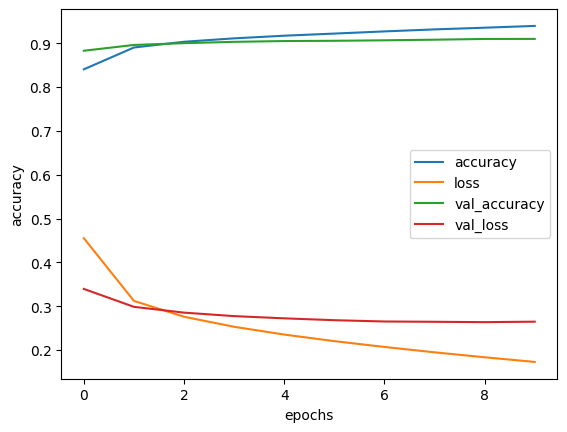

In [11]:
pd.DataFrame(HISTORY.history).plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [12]:
from sklearn.metrics import accuracy_score

# Generate predictions on the test data
predictions = model.predict(test_data_norm)

# Get the predicted class labels (the class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(test_labels, predicted_labels)

print(f"Test accuracy (using sklearn): {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test accuracy (using sklearn): 0.9099


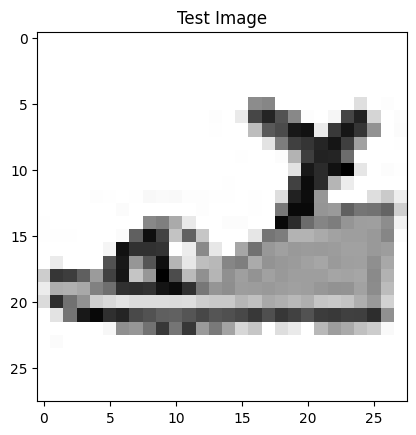

Real label: Sandal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted label: Sandal


In [20]:
import random
ic = random.randint(0, len(test_data_norm) - 1)

# Show the image
plt.imshow(test_data_norm[ic], cmap=plt.cm.binary)
plt.title("Test Image")
plt.show()

# Show true label
print(f"Real label: {class_names[test_labels[ic]]}")

#prediction
pred = model.predict(test_data_norm[ic].reshape(1, 28, 28))

# Show predicted label
print(f"Predicted label: {class_names[np.argmax(pred)]}")